<a href="https://colab.research.google.com/github/J0hnV1ct0r/Deep_learning/blob/main/DeepLearningAlura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

# Analise exploratoria dos dados

In [ ]:
roupas_dt = keras.datasets.fashion_mnist
((imagens_treino, indentificacoes_treino), (imagens_teste, indentificacoes_teste)) = roupas_dt.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Text(0.5, 1.0, '3')

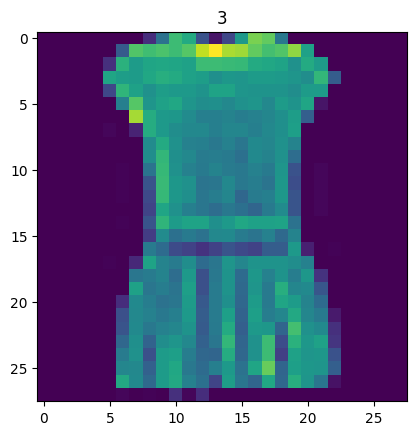

In [ ]:
plt.imshow(imagens_treino[3])
plt.title(indentificacoes_treino[3])

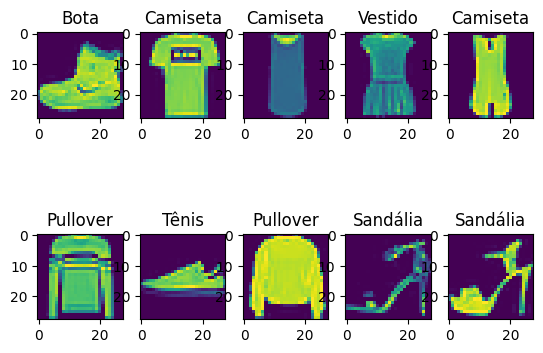

In [ ]:
nomes_classificacao = ['Camiseta','Calça', 'Pullover','Vestido','Casaco',
                       'Sandália','Camisa','Tênis','Bolsa','Bota']

for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_classificacao[indentificacoes_treino[imagem]])




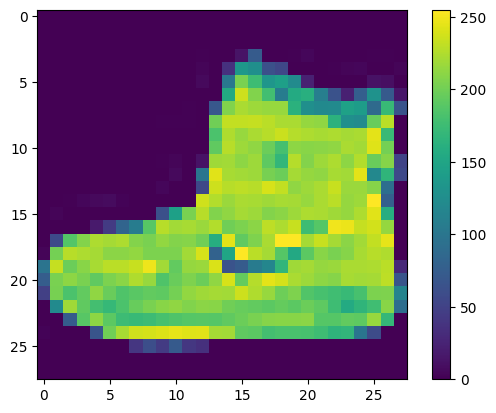

In [ ]:
plt.imshow(imagens_treino[0])
plt.colorbar()

In [ ]:
len(imagens_treino)

60000

# Treino do modelo

In [ ]:
#normalização dos dados
imagens_treino_normalizado = imagens_treino/float(255)

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
    ])

#testando um direfente passo de aprendizado
adam = keras.optimizers.Adam(lr=0.002)

#fazendo checkpoints
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss'),
             keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.hdf5',monitor='val_accuracy',save_best_only=True)]

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
historico=model.fit(imagens_treino_normalizado, indentificacoes_treino, batch_size=480, epochs=5, validation_split=0.2, callbacks=callbacks)

Epoch 1/5
100/100 [==============================] - 3s 21ms/step - loss: 0.7714 - accuracy: 0.7292 - val_loss: 0.4710 - val_accuracy: 0.8363
Epoch 2/5
100/100 [==============================] - 2s 19ms/step - loss: 0.4686 - accuracy: 0.8333 - val_loss: 0.4026 - val_accuracy: 0.8544
Epoch 3/5
100/100 [==============================] - 3s 27ms/step - loss: 0.4142 - accuracy: 0.8520 - val_loss: 0.3778 - val_accuracy: 0.8638
Epoch 4/5
100/100 [==============================] - 2s 18ms/step - loss: 0.3802 - accuracy: 0.8635 - val_loss: 0.3664 - val_accuracy: 0.8669
Epoch 5/5
100/100 [==============================] - 2s 17ms/step - loss: 0.3559 - accuracy: 0.8711 - val_loss: 0.3497 - val_accuracy: 0.8722


# Analise do modelo

In [ ]:
#resumo do modelo
sumario_model = model.summary()
sumario_model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235

In [ ]:
model.save('model.h5')
modelo_salvo = load_model('model.h5')

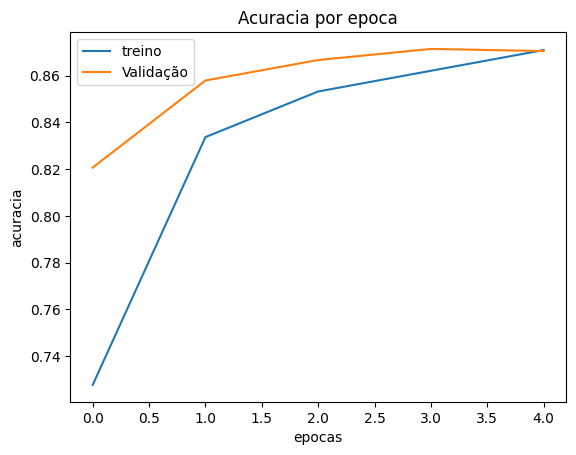

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acuracia por epoca')
plt.xlabel('epocas')
plt.ylabel('acuracia')
plt.legend(['treino', 'Validação'])

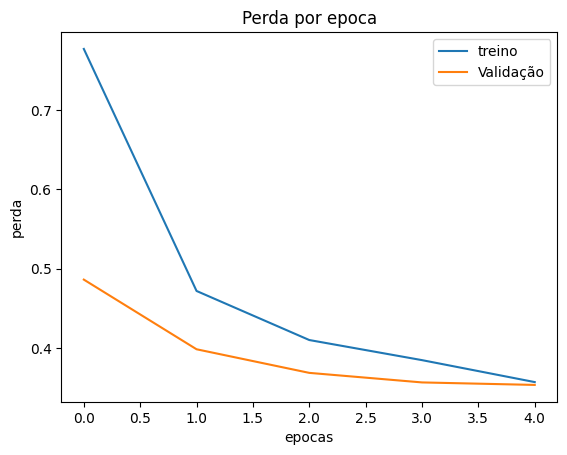

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por epoca')
plt.xlabel('epocas')
plt.ylabel('perda')
plt.legend(['treino', 'Validação'])

## Brincado com os pesos

In [ ]:
#lista dos pesos da primeira camada dense
peso_camda_dense = model.layers[1].get_weights()[0]

In [ ]:
#lista dos vieses da primeira camada dense
vieses_camada_dense = model.layers[1].get_weights()[1]

In [ ]:
peso_camda_dense.shape
peso_camda_dense_zerado = np.zeros((784,256))
peso_camda_dense_aleatorios = np.random.rand(784,256)

In [ ]:
#colocando na rede os pesos de teste
#model.layers[1].set_weights([peso_camda_dense_zerado,vieses_camada_dense])
#model.layers[1].set_weights([peso_camda_dense_aleatorios,vieses_camada_dense])

In [ ]:
#teste do impacto da brincadeira
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
historico=model.fit(imagens_treino_normalizado, indentificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 10s 6ms/step - loss: 0.4179 - accuracy: 0.8465 - val_loss: 0.3873 - val_accuracy: 0.8597
Epoch 2/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3768 - accuracy: 0.8607 - val_loss: 0.3622 - val_accuracy: 0.8612
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3568 - accuracy: 0.8698 - val_loss: 0.3481 - val_accuracy: 0.8767
Epoch 4/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3417 - accuracy: 0.8741 - val_loss: 0.3377 - val_accuracy: 0.8759
Epoch 5/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3275 - accuracy: 0.8790 - val_loss: 0.3285 - val_accuracy: 0.8823


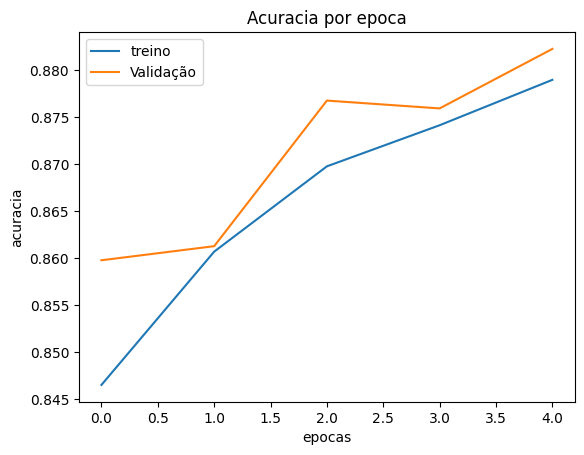

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acuracia por epoca')
plt.xlabel('epocas')
plt.ylabel('acuracia')
plt.legend(['treino', 'Validação'])

## brincando com os vieses


In [ ]:
#lista dos vieses da primeira camada dense
vieses_camada_dense = model.layers[1].get_weights()[1]
vieses_camada_dense.shape

(256,)

In [ ]:
#vieses de teste
vieses_camada_dense_zerados = np.zeros((256,))

In [ ]:
#colocando os vieses de teste
#model.layers[1].set_weights([peso_camda_dense_zerado,vieses_camada_dense_zerados])
#model.layers[1].set_weights([peso_camda_dense_aleatorios,vieses_camada_dense_zerados])

In [ ]:
#teste do impacto da brincadeira
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
historico=model.fit(imagens_treino_normalizado, indentificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3158 - accuracy: 0.8840 - val_loss: 0.3542 - val_accuracy: 0.8742
Epoch 2/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3073 - accuracy: 0.8846 - val_loss: 0.3220 - val_accuracy: 0.8858
Epoch 3/5
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2966 - accuracy: 0.8898 - val_loss: 0.3129 - val_accuracy: 0.8878
Epoch 4/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2915 - accuracy: 0.8909 - val_loss: 0.3188 - val_accuracy: 0.8855
Epoch 5/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2864 - accuracy: 0.8939 - val_loss: 0.3116 - val_accuracy: 0.8867


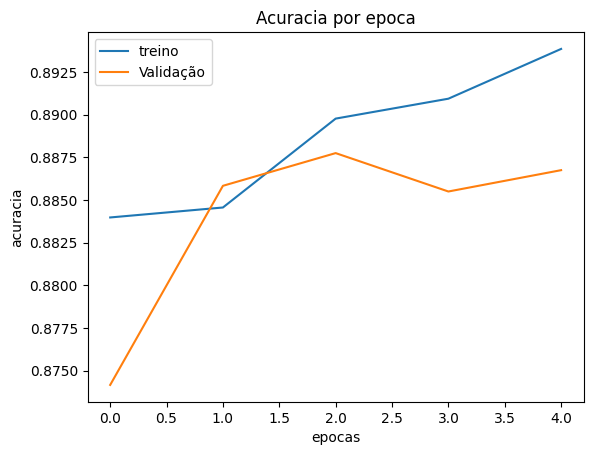

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acuracia por epoca')
plt.xlabel('epocas')
plt.ylabel('acuracia')
plt.legend(['treino', 'Validação'])

# Validação do modelo

In [ ]:
teste = model.predict(imagens_teste)
print('resultado da predição:', np.argmax(teste[2]))
print('numero real da imagem:',indentificacoes_teste[2])

313/313 [==============================] - 1s 2ms/step
resultado da predição: 1
numero real da imagem: 1


In [ ]:
perda_teste, acuracia_teste = model.evaluate(imagens_teste, indentificacoes_teste)
print('Perda do teste: ', perda_teste)
print('Acuracia do teste: ', acuracia_teste)

313/313 [==============================] - 1s 2ms/step - loss: 48.5418 - accuracy: 0.8600
Perda do teste:  48.541831970214844
Acuracia do teste:  0.8600000143051147
